In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

# Boltzmann Transport Equation

Source - Lu, L., Pestourie, R., Johnson, S. G. & Romano, G. Multifidelity deep neural operators for efficient learning of partial differential equations with application to fast inverse design of nanoscale heat transport. Phys. Rev. Research 4, 023210 (2022).

* The nondiffusive heat transport with the steady-state phonon Boltzmann transport equation (BTE).

$\begin{equation}
-\mathbf{v}_{\mu} \cdot \nabla f_{\mu} \mathbf{(r)} = \frac{f_{\mu} \mathbf{(r)} - f_{\mu}^{0} \mathbf{(r)}}{\tau_{\mu}},
\end{equation}$

* where $\mathbf{v}_{\mu}$ and $\tau_{\mu}$ are the phonon group velocity and intrinsic scattering time, respectively.
* The label $\mu$ indicates both the phonon wave vector and polarization.
* The unknown of the above equation is the nonequilibrium phonon distribution $f_{\mu} \mathbf{(r)}$.
* Both the group velocities and the scattering times, computed with density functional theory, are obtained by AlmaBTE using a wave-vector discretization of 24 × 24 × 24.
* The equilibrium distribution f 0 μ (r), under the assumption of small temperature variation, is given by
$$
f_{\mu}^{0} \mathbf{(r)} = \sum_{\mu'} \alpha_{\mu'} f_{\mu'} \mathbf{(r)},\\
$$
* where $\alpha_{\mu'} = C_{\mu'}/\tau_{\mu'}(\sum_{\mu''}C_{\mu''}/\tau_{\mu''})^{-1}$; the terms $C_{\mu}$ and $\tau_{\mu}$ are the mode-resolved heat capacity and scattering time, respectively.
* We consider BTE defined on a rectangular domain (in nm) $\Omega = [−50, 50] \times [−50, 50]$ with periodic boundary conditions in both $x$ and $y$ directions, and a temperature difference of 1 K is applied along the $x$ axis.
* Inside the domain we have a five by five equispaced array of small squares.
* Each square is of size (10, 10) and can be a pore without any material. Along the wall of the pores we adopt the totally diffuse boundary conditions.

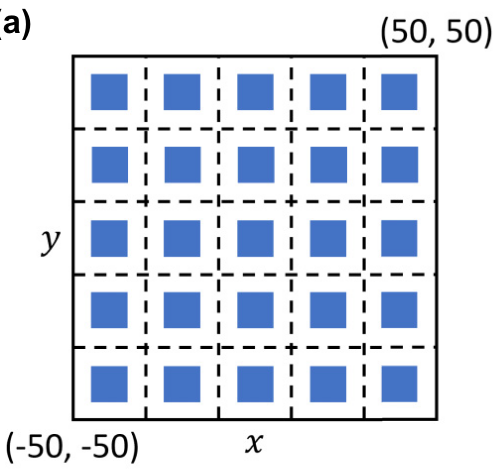

In [2]:
%matplotlib inline
from IPython.display import Image
Image('./domain_pore location.png')

* We solve BTE equation by the finite-volume method implemented in the free/open-source software OpenBTE, which adopts the source iteration scheme, i.e.,
$$
\tau_{\mu}\mathbf{v}_{\mu}\cdot \nabla f_{\mu}^{(n)}\mathbf{(r)} + f_{\mu}^{(n)}\mathbf{(r)} = \sum_{\mu'} a_{\mu'} f_{\mu'}^{(n-1)}\mathbf{(r)}.\\
$$
* Here we are interested in the heat flux $\mathbf{J} = \frac{1}{\mathcal{V}} \sum_{\mu} C_{\mu} \mathbf{v}_{\mu} f_{\mu}$ ($\mathcal{V}$ being a normalization volume), and aim to learn the flux for different locations of pores.
* We generate the data set by randomly sampling the locations of pores.
* For a different number and locations of the pores, we have different BTE solutions.
* Each data point in the data set is a pair of the pore locations and the corresponding solution of flux in the mesh nodes.
* There are in total $2^{25} \approx 3.4 \times 10^7$ possibilities, and two examples of the random pore locations and the corresponding flux is shown below.
* Different geometry has different mesh, and the mesh nodes of the two examples are the dots in the figure below.

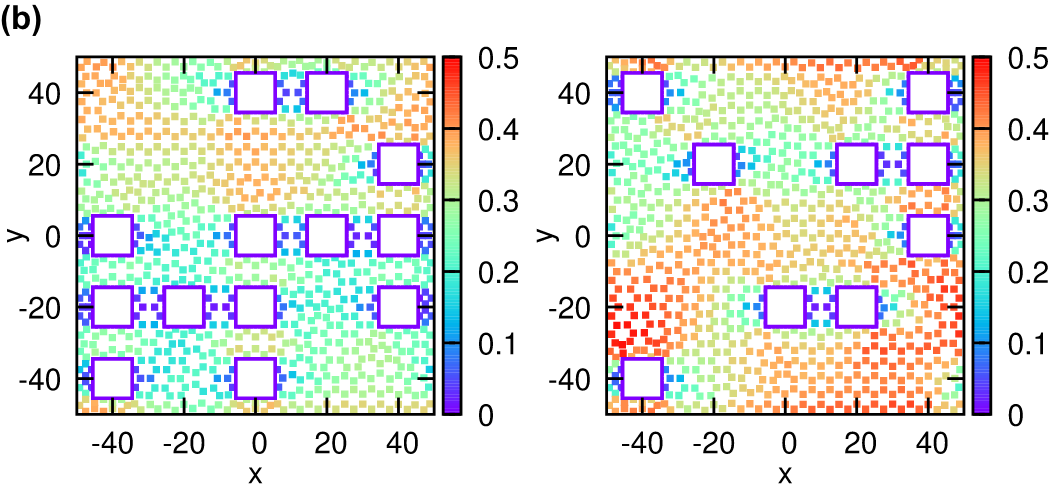

In [3]:
%matplotlib inline
from IPython.display import Image
Image('./example_pore location and flux.png')

* On average, each mesh has 902 nodes. 
* The high-fidelity solutions are obtained by 
$$
\tau_{\mu}\mathbf{v}_{\mu}\cdot \nabla f_{\mu}^{(n)}\mathbf{(r)} + f_{\mu}^{(n)}\mathbf{(r)} = \sum_{\mu'} a_{\mu'} f_{\mu'}^{(n-1)}\mathbf{(r)}.\\
$$
solved for five iterations, while the low-fidelity solutions are obtained with only two iterations.
* In DeepONet, the branch net input $v = (v_{1,1}, v_{1,2},\dots,v_{5,5})$ represents the locations of pores. 
* If $v_{i, j} = 1$, then it is a pore, otherwise it is not a pore. 
We note that when training DeepONet, we scale the $x$ and $y$ coordinates from [−50, 50] to [−1, 1] and also normalize the network output to zero mean and unit variance.
* We train a DeepONet with only high-fidelity solutions, where the branch net and the trunk net use ReLU activation function and have four and five layers, respectively. 
* DeepONet is trained with an Adam optimizer with a learning rate $10^{−4}$ for 100 000 epochs. 
* The DeepONet needs about 150 training data to achieve similar accuracy of the low-fidelity solver.